In [1]:
import urllib.request
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
# Read the file using pd.read_csv()
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
#split the data set
feature = ["Pregnancies", "PlasmaGlucose","DiastolicBloodPressure","TricepsThickness","SerumInsulin","BMI","DiabetesPedigree","Age"]
label = "Diabetic"

X,y = diabetes_df[feature].values, diabetes_df[label].values

In [4]:
#print information about the project
for n in range(0,4):
    print("Patient", str(n+1),"\n Features:", list(X[n]), "\n label:", y[n])

Patient 1 
 Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 label: 0
Patient 2 
 Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 label: 0
Patient 3 
 Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 label: 0
Patient 4 
 Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 label: 1


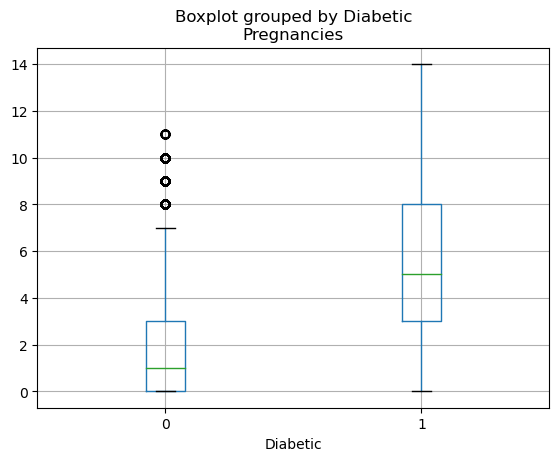

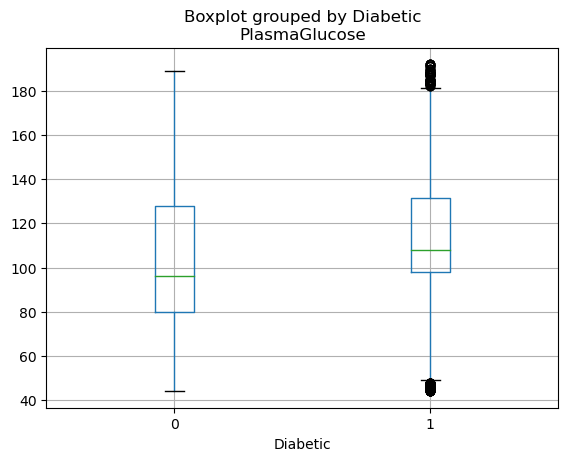

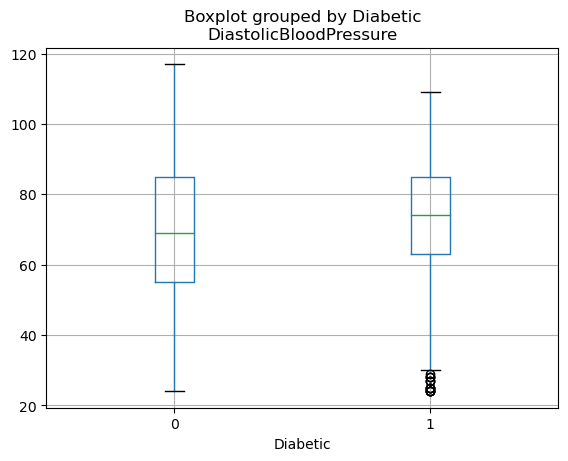

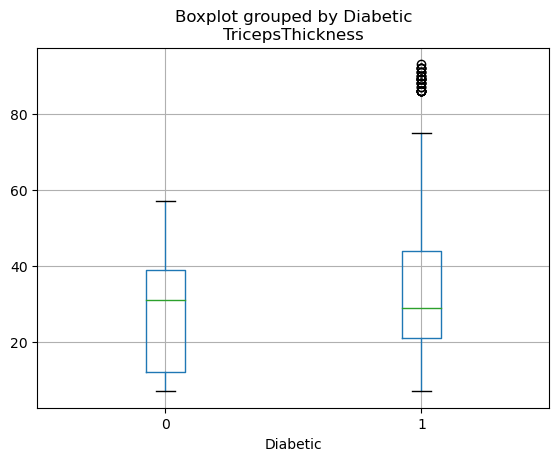

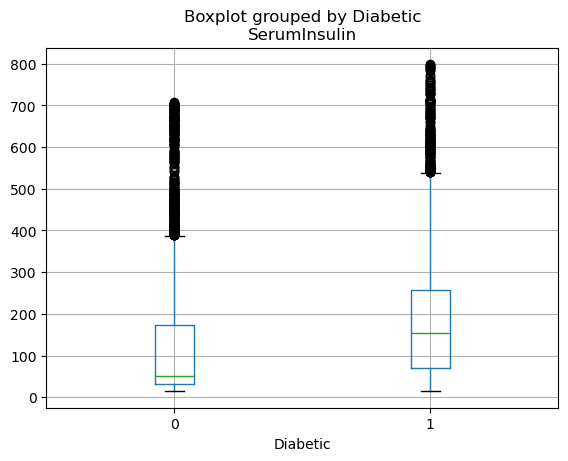

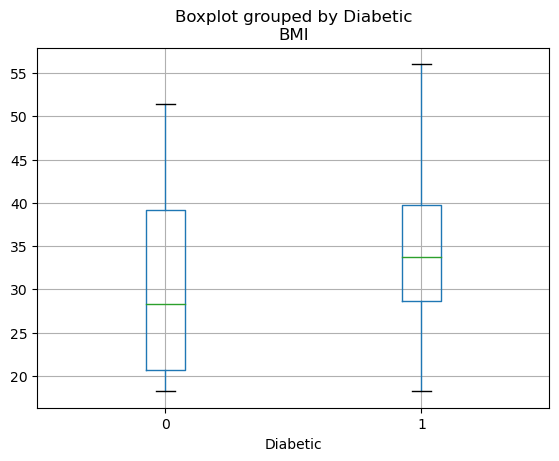

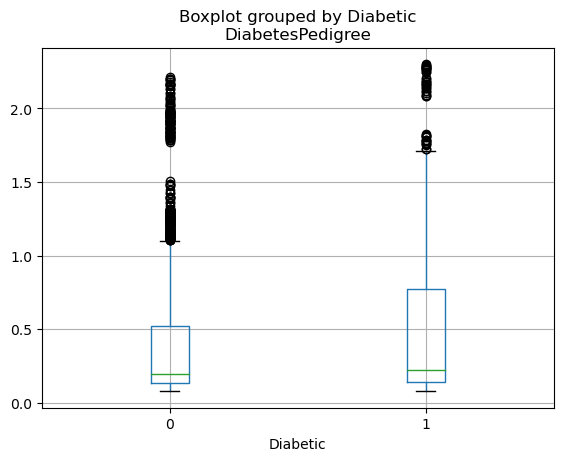

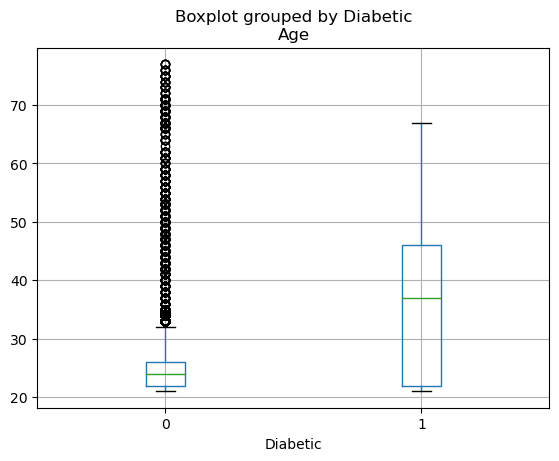

In [5]:
feature = ["Pregnancies", "PlasmaGlucose","DiastolicBloodPressure","TricepsThickness","SerumInsulin","BMI","DiabetesPedigree","Age"]
for col in feature:
    diabetes_df.boxplot(column =col, by = "Diabetic")
    plt.title(col)
    plt.show()

In [6]:
# Split data 70%-30% into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)
print("Training cases: %d\n Test Cases: %d " % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
 Test Cases: 4500 


In [7]:
# Set regularization rate
reg = 0.01
#train logistic regression model on the training set
model = LogisticRegression(C = 1/reg, solver ="liblinear").fit(X_train, y_train)
model

LogisticRegression(C=100.0, solver='liblinear')

In [8]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


In [9]:
Accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", round(Accuracy, 3))

Accuracy:  0.789


In [10]:
classification = classification_report(y_test, predictions)
print("classification: ", classification)

classification:                precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [11]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("precision_score: ", precision)
print("recall_score: ", recall )

precision_score:  0.7242472266244057
recall_score:  0.6036988110964333


In [12]:
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


In [13]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81651727 0.18348273]
 [0.96298333 0.03701667]
 [0.80862083 0.19137917]
 ...
 [0.60688422 0.39311578]
 [0.10672996 0.89327004]
 [0.63865894 0.36134106]]


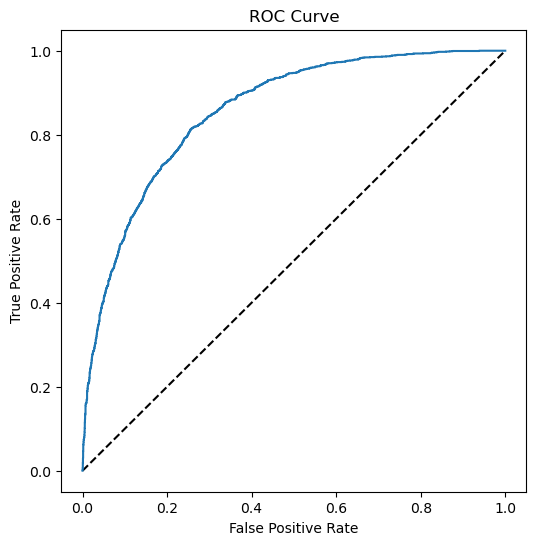

In [14]:
# calculate the roc curve
fpr,tpr,thresholds = roc_curve(y_test, y_scores[:, 1])
# plot ROC curve
fig = plt.figure(figsize = (6,6))
# Plot the diagonal 50% line
plt.plot([0,1], [0,1],"k--")
# Plot the FPR and TPR achieved by our model
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [15]:
#calculate the roc_auc_score

auc = roc_auc_score(y_test, y_scores[:,1])
print("AUC:", round(auc, 3))

AUC: 0.857


In [16]:
#  Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps = [
     ('scaler', StandardScaler())])
# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown = "ignore"))])
# Combine preprocessing steps
preprocessor = ColumnTransformer(
   transformers = [
       ("num", numeric_transformer,numeric_features),
       ("cat", categorical_transformer, categorical_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps = [("preprocessor",preprocessor),
                            ("logregressor",LogisticRegression(C = 1/reg, solver = "liblinear"))])
# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


In [17]:
# Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.
# fit the pipeline to train a logistic regression model on the training set
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [18]:
y_scores = model.predict_proba(X_test)
y_scores

array([[9.99939504e-01, 6.04964940e-05],
       [9.36812400e-01, 6.31876002e-02],
       [6.87318544e-01, 3.12681456e-01],
       ...,
       [4.59729412e-01, 5.40270588e-01],
       [3.47690418e-02, 9.65230958e-01],
       [5.04425131e-01, 4.95574869e-01]])

In [19]:
# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print("confusion matrix: \n", cm)

confusion matrix: 
 [[2638  348]
 [ 600  914]]


In [20]:
accuracy = accuracy_score(y_test, predictions)
round(accuracy,3)

0.789

In [21]:
precision = precision_score(y_test, predictions)
precision

0.7242472266244057

In [22]:
recall = recall_score(y_test, predictions)
recall

0.6036988110964333

In [23]:
auc = roc_auc_score(y_test, y_scores[:, 1])
auc

0.9202444963329531

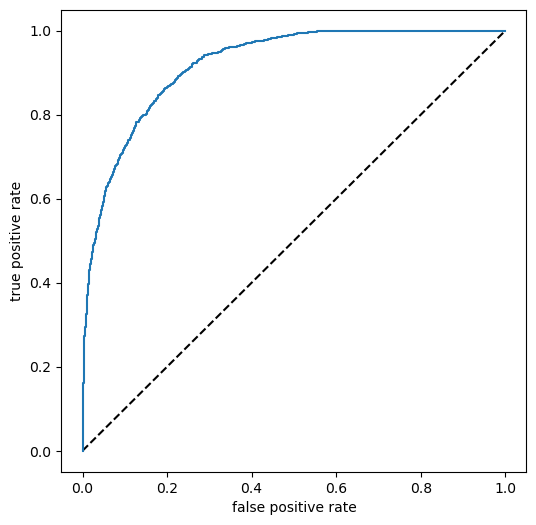

In [24]:
#calculate roc_curve

fpr,tpr,threshold = roc_curve(y_test, y_scores[:, 1])
#plot roc curve
fig = plt.figure(figsize = (6,6))
#plot the diagonal 50% line
plt.plot([0,1],[0,1],"k--")
# Plot the FPR and TPR achieved by our model
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [27]:
#Try a different algorithm
pipeline = Pipeline(steps= [
        ("preprocessor", preprocessor),
        ("logregressor", RandomForestClassifier(n_estimators =100))])
# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


In [28]:
# Let's look at the performance metrics for the new model.
prediction = model.predict(X_test)
prediction

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
y_scores = model.predict_proba(X_test)
y_scores

array([[0.99, 0.01],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [0.01, 0.99],
       [0.04, 0.96],
       [0.43, 0.57]])

In [30]:
cm = confusion_matrix(y_test, prediction)
cm

array([[2851,  135],
       [ 170, 1344]], dtype=int64)

In [31]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7893333333333333

In [32]:
precision = precision_score(y_test, predictions)
precision 

0.7242472266244057

In [33]:
recall = recall_score(y_test, predictions)
recall

0.6036988110964333

In [35]:
auc = roc_auc_score(y_test, y_scores[:, 1])
auc

0.9821255245748323

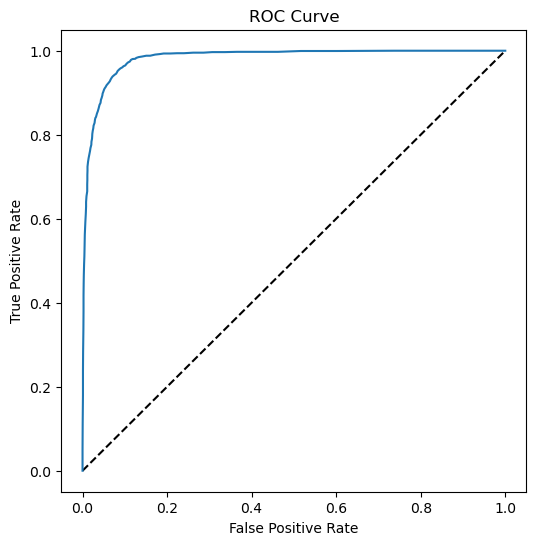

In [36]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Use the Model for Inferencing


In [38]:
# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']